In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import re
import pywt
from scipy.signal import firwin, lfilter

In [17]:
def calcular_mad(lista):
    # Calcular la mediana de la lista
    mediana = np.median(lista)

    # Calcular las desviaciones absolutas de cada elemento respecto a la mediana
    desviaciones_absolutas = np.abs(np.array(lista) - mediana)

    # Calcular la mediana de las desviaciones absolutas
    mad = np.median(desviaciones_absolutas)

    return mad

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
fs= 1000;

# Ruta al archivo de texto
archivo = '/content/drive/MyDrive/ECG_Signals/bruno_reposo.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/fs;

In [22]:
# Realizar la descomposición en wavelets Coiflets 5
coeffs = pywt.wavedec(x, 'coif5', level=5)

lst_med=[]

for coef in coeffs:
    mediana=np.median(coef)
    lst_med.append(mediana)

mad = calcular_mad(lst_med)
smad= mad/0.6745
# Establecer un umbral para el denoising
umbral = smad*(math.sqrt(len(x)))

# Aplicar el umbral a los coeficientes
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'coif5')



In [21]:

# Realizar la descomposición en wavelets Symlet 8
coeffs2 = pywt.wavedec(x, 'sym8', level=5)

lst_med2=[]

for coef2 in coeffs2:
    mediana2=np.median(coef2)
    lst_med2.append(mediana2)

mad2 = calcular_mad(lst_med2)
smad2= mad2/0.6745
# Establecer un umbral para el denoising
umbral2 = smad2*(math.sqrt(len(x)))

# Aplicar el umbral a los coeficientes
coeffs_umbral2 = [pywt.threshold(c, umbral2, mode='soft') for c in coeffs2]

# Reconstruir la señal denoised
senal_denoised2 = pywt.waverec(coeffs_umbral2, 'sym8')

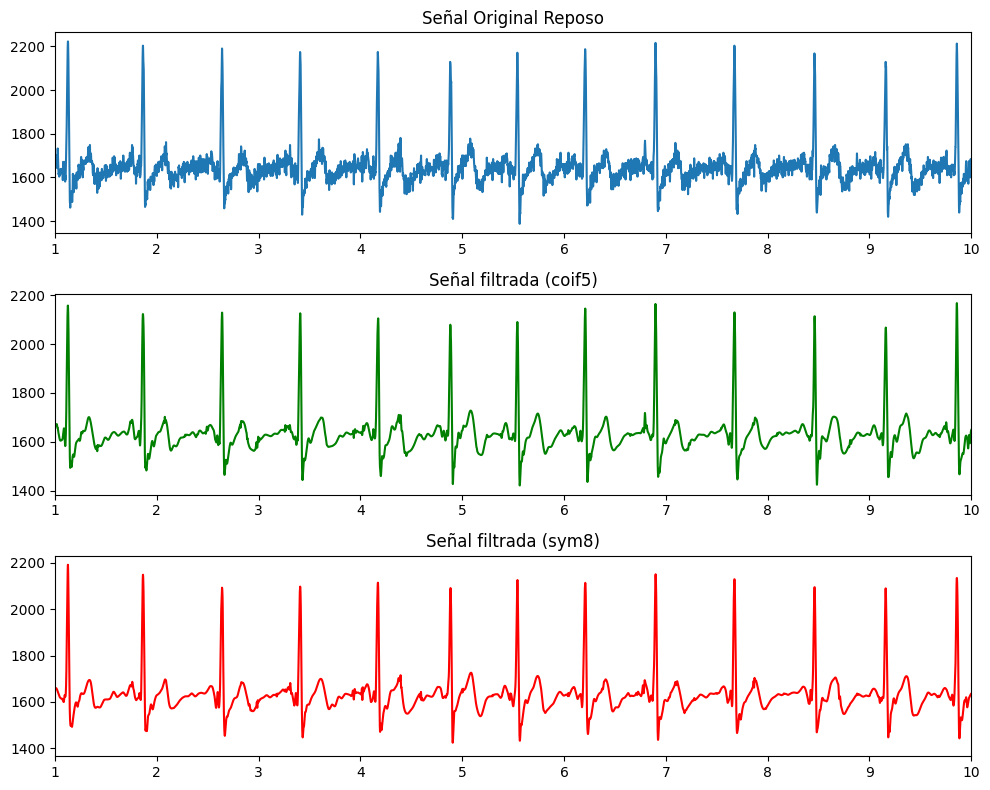

In [20]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(ts, x, label='Señal Original')
plt.xlim(1,10)
plt.title('Señal Original Reposo')

plt.subplot(3, 1, 2)
plt.plot(ts, senal_denoised,'g', label='Señal Denoised')
plt.xlim(1,10)
plt.title('Señal filtrada (coif5)')

plt.subplot(3, 1, 3)
plt.plot(ts, senal_denoised2,'r', label='Señal Denoised')
plt.xlim(1,10)
plt.title('Señal filtrada (sym8)')

plt.tight_layout()
plt.show()